In [1]:
import pandas as pd
import numpy as np

## criar dataset 

dados=pd.DataFrame()
for i in range(1,21):
    teste=pd.read_json('treated/weighings_partition'+str(i)+'.json')#+str(i)
    dados=dados.append(teste, ignore_index=True)

dados.to_csv('all_weighings_full_new.csv')

In [ ]:
dados.shape[0]

In [ ]:
dados._id.nunique()

- todos os id sao unicos - 3361480

In [ ]:
dados=dados.drop(['cellId_0','cellId_1','cellId_2','cellId_3','cellId_4','cellId_5','cellId_6','cellId_7'], axis=1)

In [ ]:
details=pd.DataFrame(dados.dtypes, columns=['type'])
details['#Nan']=dados.isnull().sum(axis = 0)
details['#uniques']=dados.nunique()

In [ ]:
details

In [ ]:
dados2=pd.read_csv('all_weighings_full.csv').drop(['Unnamed: 0','cellId_0','cellId_1','cellId_2','cellId_3','cellId_4','cellId_5','cellId_6','cellId_7'], axis=1)

In [ ]:
details=pd.DataFrame(dados2.dtypes, columns=['type'])
details['#Nan']=dados2.isnull().sum(axis = 0)
details['#uniques']=dados2.nunique()

In [ ]:
details

In [ ]:
dados.head(3)

In [ ]:
dados2.head(3)

dados2=pd.read_excel('111115.xlsx')#.drop(['Unnamed: 0','cellId_0','cellId_1','cellId_2','cellId_3','cellId_4','cellId_5','cellId_6','cellId_7'], axis=1)

## Ler novos dados

In [2]:
dados=pd.read_csv('all_weighings_full_new.csv').drop(['Unnamed: 0','cellId_0','cellId_1','cellId_2','cellId_3','cellId_4','cellId_5','cellId_6','cellId_7'], axis=1)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3,8,11,14,17,20,23,26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
dados.head()

In [ ]:
dados.cellSerialNumber_0.unique()

In [3]:
dados['cellSerialNumber_0']=dados['cellSerialNumber_0'].fillna(0)
dados['cellSerialNumber_1']=dados['cellSerialNumber_1'].fillna(0)
dados['cellSerialNumber_2']=dados['cellSerialNumber_2'].fillna(0)
dados['cellSerialNumber_3']=dados['cellSerialNumber_3'].fillna(0)
dados['cellSerialNumber_4']=dados['cellSerialNumber_4'].fillna(0)
dados['cellSerialNumber_5']=dados['cellSerialNumber_5'].fillna(0)
dados['cellSerialNumber_6']=dados['cellSerialNumber_6'].fillna(0)
dados['cellSerialNumber_7']=dados['cellSerialNumber_7'].fillna(0)

clean0=dados['cellSerialNumber_0'].tolist()
clean1=dados['cellSerialNumber_1'].tolist()
clean2=dados['cellSerialNumber_2'].tolist()
clean3=dados['cellSerialNumber_3'].tolist()
clean4=dados['cellSerialNumber_4'].tolist()
clean5=dados['cellSerialNumber_5'].tolist()
clean6=dados['cellSerialNumber_6'].tolist()
clean7=dados['cellSerialNumber_7'].tolist()

for i in range(0, len(clean0)):
    if type(clean0[i]) == float:
        clean0[i]=str(int(clean0[i]))
    if type(clean1[i]) == float:
        clean1[i]=str(int(clean1[i]))
    if type(clean2[i]) == float:
        clean2[i]=str(int(clean2[i]))
    if type(clean3[i]) == float:
        clean3[i]=str(int(clean3[i]))
    if type(clean4[i]) == float:
        clean4[i]=str(int(clean4[i]))
    if type(clean5[i]) == float:
        clean5[i]=str(int(clean5[i]))
    if type(clean6[i]) == float:
        clean6[i]=str(int(clean6[i]))
    if type(clean7[i]) == float:
        clean7[i]=str(int(clean7[i]))

        
clean0=[str(i) for i in clean0]
clean1=[str(i) for i in clean1]
clean2=[str(i) for i in clean2]
clean3=[str(i) for i in clean3]
clean4=[str(i) for i in clean4]
clean5=[str(i) for i in clean5]
clean6=[str(i) for i in clean6]
clean7=[str(i) for i in clean7]

for i in range(0, len(clean0)):
    if clean0[i][0] == '0' and len(clean0[i])>1:
        clean0[i]=clean0[i][1:]
    if clean1[i][0] == '0'and len(clean1[i])>1:
        clean1[i]=clean1[i][1:]
    if clean2[i][0] == '0' and len(clean2[i])>1:
        clean2[i]=clean2[i][1:]
    if clean3[i][0] == '0'and len(clean3[i])>1:
        clean3[i]=clean3[i][1:]
    if clean4[i][0] == '0'and len(clean4[i])>1:
        clean4[i]=clean4[i][1:]
    if clean5[i][0] == '0'and len(clean5[i])>1:
        clean5[i]=clean5[i][1:]
    if clean6[i][0] == '0'and len(clean6[i])>1:
        clean6[i]=clean6[i][1:]
    if clean7[i][0] == '0'and len(clean7[i])>1:
        clean7[i]=clean7[i][1:]

dados['cellSerialNumber_0']=clean0
dados['cellSerialNumber_1']=clean1
dados['cellSerialNumber_2']=clean2
dados['cellSerialNumber_3']=clean3
dados['cellSerialNumber_4']=clean4
dados['cellSerialNumber_5']=clean5
dados['cellSerialNumber_6']=clean6
dados['cellSerialNumber_7']=clean7

dados[['terminalSerialNumber']]=dados[['terminalSerialNumber']].astype(str)

## filtrar pela ponte relevante

In [4]:
ponte=dados[dados['scaleSerialNumber']=='P191021852']

In [ ]:
ponte.shape

In [ ]:
details=pd.DataFrame(ponte.dtypes, columns=['type'])
details['#Nan']=ponte.isnull().sum(axis = 0)
details['#uniques']=ponte.nunique()
details

In [5]:
ponte=ponte.drop(['terminalSerialNumber','scaleSerialNumber','scaleNet'],axis=1)

## ordenar data

In [6]:
ordenado=ponte.sort_values(by='timestamp')

In [ ]:
avaliar=ordenado.groupby(['cellSerialNumber_0','cellSerialNumber_1','cellSerialNumber_2','cellSerialNumber_3','cellSerialNumber_4','cellSerialNumber_5','cellSerialNumber_6','cellSerialNumber_7']).count()
ocorrencias=avaliar.sort_values(['cellSerialNumber_7','cellSerialNumber_6','cellSerialNumber_5','cellSerialNumber_4','cellSerialNumber_3','cellSerialNumber_2','cellSerialNumber_1','cellSerialNumber_0'],ascending=False)

In [ ]:
ocorrencias

dia[dia['period'] < pd.Timedelta(4, unit='s')]

In [ ]:
a=1
dia['measurement']=1
for i in range(dia.shape[0]):
    if dia['period'][i] < pd.Timedelta(4, unit='s'):
        dia['measurement'][i]=a
    else:
        a=a+1
        dia['measurement'][i]=a

In [ ]:
dia.head(3)

In [ ]:
dia.measurement.value_counts()

In [ ]:
dia[dia.measurement == 53]

In [ ]:
dia.measurement.value_counts().plot(kind='bar')

Consideraçoes
- no dia 10 temos 81 pesagens separadas
- a maior pesagem engloba 180 amostras separadas por 3s
- multiplas pesagens têm so 1 amostra - estranho

In [ ]:
dia=ordenado.reset_index(drop=True)
dia['timestamp']= pd.to_datetime(dia['timestamp']) 

In [ ]:
dia.head()

In [ ]:
dia['period']=dia.timestamp.diff()
dia['period'][0]=0
dia['period']=pd.to_timedelta(dia['period'])

In [ ]:
a=1
dia['measurement']=1
for i in range(dia.shape[0]):
    if dia['period'][i] < pd.Timedelta(4, unit='s'):
        dia['measurement'][i]=a
    else:
        a=a+1
        dia['measurement'][i]=a

In [ ]:
a

In [ ]:
dia.measurement.value_counts()

In [ ]:
teste=dia[dia.measurement == 30722]

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(teste.timestamp, teste.cellWeight_0)

In [ ]:
dia102=teste.fillna(method='ffill')


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
#plt.xlim=((2000, 6000))

plt.plot(dia102.timestamp, dia102.cellWeight_0, 'r')
plt.plot(teste.timestamp, teste.cellWeight_0, 'g')

In [ ]:
teste.describe()

In [ ]:
teste

In [ ]:
dia.head()

In [ ]:
dia.groupby(['measurement','cellSerialNumber_0']).count()


In [ ]:
dia.groupby(['measurement']).mean()#,'cellWeight_0']).mean()

In [ ]:
dia.head()

In [ ]:
dia_interpolado=dia[1].fillna(method='ffill')

In [ ]:
dia_interpolado=dia.loc[1]

In [ ]:
type(dia_interpolado)

In [ ]:
dia_interpolado=dia.set_index('measurement')
dia_interpolado

In [ ]:
dia_interpolado=dia.groupby('measurement')
for i in range(20):
    dia_interpolado.measurement.iloc[i]=

In [ ]:
dia_interpolado.loc[3].fillna(method='ffill')

In [ ]:
dia['period'][1]

In [ ]:
dia['period'].dt.days

In [ ]:
df = df[df['col'] < pd.Timedelta(30, unit='s')]

In [ ]:
dia['period'] < pd.Timedelta(30, unit='s')

In [ ]:
type(dia['period'])

In [ ]:
#dia[
dia['period'].dt.total_seconds()# < pd.Timedelta(30, unit='s')]

In [ ]:
import datetime
dia.period> Timedelta('0 days 00:00:03')#datetime.timedelta(seconds=1)

## separar e alterar

In [ ]:
ordenado.head(3)

In [ ]:
ordenado.scaleGross.isnull().sum()

In [ ]:
ordenado.loc[pd.isnull(ordenado.scaleGross)]

In [7]:
ordenado['timestamp']= pd.to_datetime(ordenado['timestamp']) 

In [8]:
ordenado=ordenado.reset_index(drop=True)
ordenado['period']=ordenado.timestamp.diff()
ordenado['period'][0]=0
ordenado['period']=pd.to_timedelta(ordenado['period'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
ordenado['period'].value_counts().head(30)

- dificil determinar qual a tolerancia de falha para amostras separadas por mais de 3s

In [ ]:
ordenado

### 1) separar pesagens 

In [9]:
a=1
ordenado['measurement']=1
for i in range(ordenado.shape[0]):
    if ordenado['period'][i] < pd.Timedelta(31, unit='s'):  #4
        ordenado['measurement'][i]=a
    else:
        a=a+1
        ordenado['measurement'][i]=a

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
print('Numero total de pesagens isoladas: ' + str(a))
ordenado.measurement.value_counts()

Numero total de pesagens isoladas: 13111


9498     10213
1351      5630
1327      5161
11484     4474
10877     4172
         ...  
1359         1
1061         1
9547         1
9121         1
12472        1
Name: measurement, Length: 13111, dtype: int64

In [55]:
ordenado.shape

(423069, 21)

In [54]:
ordenado[['cellSerialNumber_0','cellWeight_0','cellSerialNumber_1','cellWeight_1','cellSerialNumber_2','cellWeight_2','cellSerialNumber_3','cellWeight_3','cellSerialNumber_4','cellWeight_4','cellSerialNumber_5','cellWeight_5','cellSerialNumber_6','cellWeight_6','cellSerialNumber_7','cellWeight_7']]

,_id,timestamp,scaleGross,cellSerialNumber_0,cellWeight_0,cellSerialNumber_1,cellWeight_1,cellSerialNumber_2,cellWeight_2,cellSerialNumber_3,...,cellSerialNumber_4,cellWeight_4,cellSerialNumber_5,cellWeight_5,cellSerialNumber_6,cellWeight_6,cellSerialNumber_7,cellWeight_7,period,measurement
0,5cd43963a61883ad63c5835e,2019-05-09 14:22:55,0.0,7450332,0.0,7450333,0.0,7450339,0.0,7450340,...,7450338,0.0,7450337,0.0,7450336,0.0,7450341,0.0,00:00:00,1
1,5cd43965a618830094c58367,2019-05-09 14:22:58,0.0,7450332,0.0,7450333,0.0,7450339,-10.0,7450340,...,7450338,0.0,7450337,0.0,7450336,0.0,7450341,0.0,00:00:03,1
2,5cd43968a61883e53ac58370,2019-05-09 14:23:01,0.0,7450332,0.0,7450333,0.0,7450339,0.0,7450340,...,7450338,0.0,7450337,0.0,7450336,0.0,7450341,0.0,00:00:03,1
3,5cd4396ba618835713c58379,2019-05-09 14:23:04,0.0,7450332,0.0,7450333,0.0,7450339,0.0,7450340,...,7450338,0.0,7450337,0.0,7450336,0.0,7450341,0.0,00:00:03,1
4,5cd43b33a61883db28c58384,2019-05-09 14:30:40,0.0,7450332,0.0,7450333,0.0,7450339,0.0,7450340,...,7450338,0.0,7450337,0.0,7450336,0.0,7450341,0.0,00:07:36,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423064,5f1ae66137b06e0008514ebf,2020-07-24 13:46:08,0.0,7450332,10.0,7450333,0.0,7450339,0.0,7450340,...,7450338,0.0,7450337,0.0,7450336,0.0,7450341,0.0,00:00:02,13111
423065,5f1ae66337b06e0008514ec8,2020-07-24 13:46:10,0.0,7450332,0.0,7450333,0.0,7450339,0.0,7450340,...,7450338,0.0,7450337,0.0,7450336,0.0,7450341,10.0,00:00:02,13111
423066,5f1ae66537b06e0008514ed1,2020-07-24 13:46:12,0.0,7450332,0.0,7450338,0.0,7450337,0.0,7450336,...,7450341,0.0,0,NaN,0,NaN,0,NaN,00:00:02,13111
423067,5f1ae66737b06e0008514ed7,2020-07-24 13:46:13,NaN,7450332,0.0,7450336,0.0,7450341,0.0,0,...,0,NaN,0,NaN,0,NaN,0,NaN,00:00:01,13111


In [ ]:
filtragem=ordenado

In [ ]:
print('Numero total de pesagens isoladas: ' + str(a))
ordenado.measurement.value_counts()

### 2) filtrar por ter mais que 5 mediçoes

In [11]:
experiencia = ordenado.groupby('measurement').filter(lambda x: len(x) > 5)
experiencia.head()

,_id,timestamp,scaleGross,cellSerialNumber_0,cellWeight_0,cellSerialNumber_1,cellWeight_1,cellSerialNumber_2,cellWeight_2,cellSerialNumber_3,...,cellSerialNumber_4,cellWeight_4,cellSerialNumber_5,cellWeight_5,cellSerialNumber_6,cellWeight_6,cellSerialNumber_7,cellWeight_7,period,measurement
4,5cd43b33a61883db28c58384,2019-05-09 14:30:40,0.0,7450332,0.0,7450333,0.0,7450339,0.0,7450340,...,7450338,0.0,7450337,0.0,7450336,0.0,7450341,0.0,00:07:36,2
5,5cd43b36a61883180ec5838d,2019-05-09 14:30:43,NaN,7450332,-860.0,0,NaN,0,NaN,0,...,0,NaN,0,NaN,0,NaN,0,NaN,00:00:03,2
6,5cd43b39a61883300cc5838f,2019-05-09 14:30:46,0.0,7450332,0.0,7450333,0.0,7450339,0.0,7450340,...,7450338,0.0,7450337,0.0,7450336,0.0,7450341,0.0,00:00:03,2
7,5cd43b3ca618839b85c58398,2019-05-09 14:30:49,0.0,7450332,10.0,7450333,0.0,7450339,0.0,7450340,...,7450338,0.0,7450337,0.0,7450336,0.0,7450341,0.0,00:00:03,2
8,5cd43b3fa618834976c583a1,2019-05-09 14:30:52,80.0,7450332,80.0,7450333,0.0,7450339,0.0,7450340,...,7450338,0.0,7450337,0.0,7450336,0.0,7450341,0.0,00:00:03,2


In [12]:
print('Numero total de pesagens isoladas: ' + str(a))
experiencia.measurement.value_counts()

Numero total de pesagens isoladas: 13111


9498     10213
1351      5630
1327      5161
11484     4474
10877     4172
         ...  
1466         6
7034         6
4027         6
6266         6
8397         6
Name: measurement, Length: 6222, dtype: int64

In [ ]:
experiencia.measurement.value_counts()#.nunique()

### 2.1 filtrar mediçao > 30s

In [ ]:
experiencia.head()

In [ ]:
experiencia.groupby('measurement').period.sum()

In [ ]:
experiencia.groupby('measurement').period.sum()

In [ ]:
print('Numero total de pesagens isoladas: ' + str(experiencia.measurement.nunique()))

In [ ]:
teste4=ordenado[ordenado.measurement == 9498]
teste4.head(3)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,3))
plt.plot(teste4.timestamp, teste4.cellWeight_0)

In [ ]:
teste4.period.value_counts()

In [ ]:
teste4.cellWeight_0.value_counts()

### 3) filtrar as que sao ruido

In [ ]:
ordenado.head(2)

In [ ]:
experiencia.groupby('measurement').cellWeight_0.nunique()

In [ ]:
experiencia.groupby('measurement').cellWeight_0.nunique().sort_values()

In [46]:
filtrado= experiencia.groupby('measurement').filter(lambda x: x.cellWeight_0.nunique()>3)
filtrado.head()

,_id,timestamp,scaleGross,cellSerialNumber_0,cellWeight_0,cellSerialNumber_1,cellWeight_1,cellSerialNumber_2,cellWeight_2,cellSerialNumber_3,...,cellSerialNumber_4,cellWeight_4,cellSerialNumber_5,cellWeight_5,cellSerialNumber_6,cellWeight_6,cellSerialNumber_7,cellWeight_7,period,measurement
4,5cd43b33a61883db28c58384,2019-05-09 14:30:40,0.0,7450332,0.0,7450333,0.0,7450339,0.0,7450340,...,7450338,0.0,7450337,0.0,7450336,0.0,7450341,0.0,00:07:36,2
5,5cd43b36a61883180ec5838d,2019-05-09 14:30:43,NaN,7450332,-860.0,0,NaN,0,NaN,0,...,0,NaN,0,NaN,0,NaN,0,NaN,00:00:03,2
6,5cd43b39a61883300cc5838f,2019-05-09 14:30:46,0.0,7450332,0.0,7450333,0.0,7450339,0.0,7450340,...,7450338,0.0,7450337,0.0,7450336,0.0,7450341,0.0,00:00:03,2
7,5cd43b3ca618839b85c58398,2019-05-09 14:30:49,0.0,7450332,10.0,7450333,0.0,7450339,0.0,7450340,...,7450338,0.0,7450337,0.0,7450336,0.0,7450341,0.0,00:00:03,2
8,5cd43b3fa618834976c583a1,2019-05-09 14:30:52,80.0,7450332,80.0,7450333,0.0,7450339,0.0,7450340,...,7450338,0.0,7450337,0.0,7450336,0.0,7450341,0.0,00:00:03,2


In [57]:
experiencia.shape

(401682, 21)

In [59]:
filtrado.shape

(284522, 21)

In [61]:
filtrado.shape

(262179, 21)

In [60]:
### PERIGO GENERALIZAR PARA MSI QUE A 1 CELULA?
##no entwanto quando alguma morre, passa a posiçao da zero...
#for cell in range(8):
filtrado= experiencia.groupby('measurement').filter(lambda x: x.cellWeight_0.nunique()>3 and x.cellWeight_1.nunique()>3)


In [ ]:
filtrado.groupby('measurement').cellWeight_0.nunique().min()

In [ ]:
filtrado.groupby('measurement').cellWeight_0.nunique().sort_values()

In [ ]:
filtrado[filtrado.measurement== 8395]

In [14]:
print('Numero total de pesagens isoladas: ' + str(filtrado.measurement.nunique()))

Numero total de pesagens isoladas: 3079


### 4) ALTERAR

In [ ]:
filtrado.head(4)

In [15]:
y = pd.get_dummies(filtrado[['cellSerialNumber_0','cellSerialNumber_1','cellSerialNumber_2','cellSerialNumber_3','cellSerialNumber_4','cellSerialNumber_5','cellSerialNumber_6','cellSerialNumber_7']], prefix='', prefix_sep='')

In [16]:
substituir=y.groupby(y.columns, axis=1).sum()
substituir=substituir[['0','7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341']]
substituir

,0,7450332,7450333,7450339,7450340,7450338,7450337,7450336,7450341
4,0,1,1,1,1,1,1,1,1
5,7,1,0,0,0,0,0,0,0
6,0,1,1,1,1,1,1,1,1
7,0,1,1,1,1,1,1,1,1
8,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
422978,0,1,1,1,1,1,1,1,1
422979,0,1,1,1,1,1,1,1,1
422980,3,1,0,0,0,1,1,1,1
422981,7,1,0,0,0,0,0,0,0


In [17]:
filtrado=filtrado.reset_index()

In [18]:
substituir=substituir.reset_index(drop=True)


In [19]:
substituir2=substituir

In [20]:
substituir[['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341']]=np.nan

In [21]:
substituir2

,0,7450332,7450333,7450339,7450340,7450338,7450337,7450336,7450341
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
284517,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284518,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284519,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284520,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


for i in range(filtrado.shape[0]):
    for cell in range(8):
        if filtrado['cellSerialNumber_'+str(cell)][i]==substituir.columns[cell+1]:
            substituir2[substituir.columns[cell+1]][i]=filtrado['cellWeight_'+str(cell)][i]

In [22]:
for i in range(filtrado.shape[0]):
    for cell in range(8):
        pos= filtrado['cellSerialNumber_'+str(cell)][i]==substituir.columns[:]#.any():
        num=(np.where(pos)[0])[0]
        substituir2[substituir.columns[num]][i]=filtrado['cellWeight_'+str(cell)][i]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
for i in range(3):
    for cell in range(8):
        pos= filtrado['cellSerialNumber_'+str(cell)][i]==substituir.columns[:]#.any():
        num=(np.where(pos)[0])[0]
        substituir2[substituir.columns[num]][i]=filtrado['cellWeight_'+str(cell)][i]

In [25]:
num

0

In [24]:
substituir.columns[num]

'0'

In [23]:
substituir2

,0,7450332,7450333,7450339,7450340,7450338,7450337,7450336,7450341
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,-860.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
284517,0.0,-10.0,0.0,0.0,-10.0,10.0,0.0,0.0,0.0
284518,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
284519,NaN,10.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
284520,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
filtrado.loc[219469:219580]

In [ ]:

i=219469
for cell in range(8):
    print(filtrado['cellSerialNumber_'+str(cell)][i]==substituir.columns[cell+1])
    

In [ ]:
cell=0
i=0
pos=filtrado['cellSerialNumber_'+str(cell)][i]==substituir.columns[:].all()
num=(np.where(pos)[0])[0]
num

In [ ]:
i

In [ ]:
filtrado['cellSerialNumber_'+str(0)][i]==substituir.columns[:]#.all()

In [ ]:
substituir.columns[num]

In [ ]:
substituir.columns

In [ ]:
substituir2[substituir.columns[cell+1]][i]

In [ ]:
filtrado.loc[[219469]]

In [ ]:
substituir2[6][2]

In [26]:
subtituir_plus= pd.concat([substituir2, filtrado[['timestamp','period','measurement']]], axis=1, sort=False)

In [27]:
subtituir_plus

,0,7450332,7450333,7450339,7450340,7450338,7450337,7450336,7450341,timestamp,period,measurement
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-05-09 14:30:40,00:07:36,2
1,NaN,-860.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-09 14:30:43,00:00:03,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-05-09 14:30:46,00:00:03,2
3,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-05-09 14:30:49,00:00:03,2
4,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-05-09 14:30:52,00:00:03,2
...,...,...,...,...,...,...,...,...,...,...,...,...
284517,0.0,-10.0,0.0,0.0,-10.0,10.0,0.0,0.0,0.0,2020-07-24 08:53:07,00:00:02,13097
284518,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,2020-07-24 08:53:09,00:00:02,13097
284519,NaN,10.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,2020-07-24 08:53:11,00:00:02,13097
284520,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-24 08:53:13,00:00:02,13097


In [28]:
dia_interpolado=subtituir_plus.groupby('measurement').fillna(method='ffill')
dia_interpolado['measurement']=subtituir_plus['measurement']
dia_interpolado=dia_interpolado.set_index('measurement')

In [29]:
dia_interpolado.isnull().sum()

0            42048
7450332      29777
7450333      29121
7450339      24207
7450340      22090
7450338      21847
7450337      15126
7450336      28769
7450341      28778
timestamp        0
period           0
dtype: int64

In [ ]:
filtrado[filtrado.measurement==10797]

## VER

In [30]:
dia_interpolado.reset_index().measurement.nunique()

3079

In [42]:
dia_interpolado.reset_index().measurement.value_counts().head(50)

1351     5630
10877    4172
3023     2991
3014     2944
11495    2195
1758     1968
10738    1782
10394    1718
5076     1717
9580     1403
10880    1377
3013     1290
13030    1269
3218     1223
5832     1204
2956     1200
13037    1181
8614     1123
10324    1116
1399     1086
1732     1039
1371      999
12827     965
4765      961
1356      947
10385     936
11883     913
3378      908
12669     882
11251     871
1401      863
2851      832
5565      823
6739      822
1572      805
4694      801
12980     792
3360      790
9589      784
2407      745
3243      743
12954     708
7030      687
9761      679
3134      674
173       670
9588      669
1804      664
11254     664
9377      650
Name: measurement, dtype: int64

In [ ]:
dia_interpolado.reset_index().measurement.value_counts()

In [43]:
diacerto=dia_interpolado.loc[9377]

In [110]:
diacerto2=bons.loc[9377]

In [108]:
diacerto

,0,7450332,7450333,7450339,7450340,7450338,7450337,7450336,7450341,timestamp,period
measurement,,,,,,,,,,,
9377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2020-04-10 12:58:08,00:10:15
9377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2020-04-10 12:58:14,00:00:06
9377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2020-04-10 12:58:23,00:00:09
9377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2020-04-10 12:58:47,00:00:24
9377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2020-04-10 12:58:47,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...
9377,NaN,NaN,NaN,30.0,NaN,NaN,NaN,-10.0,-10.0,2020-04-10 13:32:35,00:00:00
9377,NaN,NaN,NaN,30.0,NaN,NaN,NaN,-10.0,-10.0,2020-04-10 13:32:38,00:00:03
9377,NaN,NaN,NaN,30.0,NaN,NaN,NaN,-10.0,-10.0,2020-04-10 13:32:38,00:00:00


In [32]:
dia_interpolado.reset_index().groupby('measurement')['7450332'].nunique().sort_values()

measurement
10797      0
11559      0
517        0
11565      0
10428      0
        ... 
10325     58
9978      61
2956      99
1198     100
2952     149
Name: 7450332, Length: 3079, dtype: int64

In [ ]:
dia_interpolado.reset_index().groupby('measurement')['7450332'].nunique().sort_values()

In [ ]:
dia_interpolado.loc[10797]

In [ ]:
experiencia.groupby('measurement').cellWeight_0.nunique().sort_values()

In [63]:
dia_interpolado.reset_index().groupby('measurement').nunique()

,measurement,0,7450332,7450333,7450339,7450340,7450338,7450337,7450336,7450341,timestamp,period
measurement,,,,,,,,,,,,
2,1,1,5,5,5,7,4,4,4,4,24,2
8,1,1,6,5,5,4,4,5,5,5,21,4
22,1,1,6,7,20,17,17,19,12,15,72,5
23,1,1,5,7,9,8,8,11,7,8,68,3
24,1,1,16,16,19,18,20,20,19,21,22,2
...,...,...,...,...,...,...,...,...,...,...,...,...
13071,1,1,3,3,3,3,6,5,4,5,27,2
13075,1,1,6,4,3,4,3,3,3,3,13,2
13076,1,1,28,25,32,32,32,32,21,19,122,4


In [69]:
dia_interpolado.shape

(284522, 11)

In [113]:
diacerto2.nunique()

0              0
7450332        1
7450333        1
7450339        3
7450340        0
7450338        0
7450337        1
7450336        2
7450341        2
timestamp    641
period         9
dtype: int64

In [115]:
maus.reset_index().groupby('measurement').nunique().max()

measurement       1
0                 1
7450332           2
7450333           2
7450339           2
7450340           2
7450338           2
7450337           2
7450336           2
7450341           2
timestamp      2195
period           15
dtype: int64

In [117]:
bons.reset_index().groupby('measurement').nunique().min()

measurement    1
0              0
7450332        0
7450333        0
7450339        1
7450340        0
7450338        0
7450337        0
7450336        0
7450341        0
timestamp      6
period         2
dtype: int64

In [98]:
maus=dia_interpolado.reset_index().groupby('measurement').filter(lambda x: x['7450332'].nunique()<3 and x['7450333'].nunique()<3 and x['7450339'].nunique()<3 and x['7450340'].nunique()<3 and x['7450338'].nunique()<3 and x['7450337'].nunique()<3 and x['7450336'].nunique() <3 and x['7450341'].nunique()<3).set_index('measurement')

In [99]:
maus

,0,7450332,7450333,7450339,7450340,7450338,7450337,7450336,7450341,timestamp,period
measurement,,,,,,,,,,,
412,NaN,NaN,NaN,7910.0,NaN,NaN,NaN,NaN,NaN,2019-05-23 11:03:32,00:01:03
412,NaN,NaN,NaN,7910.0,NaN,NaN,NaN,NaN,NaN,2019-05-23 11:03:35,00:00:03
412,NaN,NaN,NaN,7920.0,NaN,NaN,NaN,NaN,NaN,2019-05-23 11:03:38,00:00:03
412,NaN,NaN,NaN,7920.0,NaN,NaN,NaN,NaN,NaN,2019-05-23 11:03:41,00:00:03
412,NaN,NaN,NaN,7920.0,7200.0,NaN,NaN,NaN,NaN,2019-05-23 11:03:44,00:00:03
...,...,...,...,...,...,...,...,...,...,...,...
12314,NaN,2890.0,2320.0,NaN,6500.0,9580.0,10930.0,NaN,NaN,2020-07-06 05:37:45,00:00:02
12314,NaN,2890.0,2320.0,NaN,6500.0,9580.0,10930.0,NaN,NaN,2020-07-06 05:37:47,00:00:02
12314,NaN,2890.0,2320.0,NaN,6500.0,9580.0,10930.0,NaN,NaN,2020-07-06 05:37:53,00:00:06


In [86]:
print(maus[('measurement')].nunique())
maus.shape

99


(16974, 12)

In [94]:
dia_interpolado.head()

,0,7450332,7450333,7450339,7450340,7450338,7450337,7450336,7450341,timestamp,period
measurement,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-05-09 14:30:40,00:07:36
2,0.0,-860.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-05-09 14:30:43,00:00:03
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-05-09 14:30:46,00:00:03
2,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-05-09 14:30:49,00:00:03
2,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-05-09 14:30:52,00:00:03


In [100]:
maus.head()

,0,7450332,7450333,7450339,7450340,7450338,7450337,7450336,7450341,timestamp,period
measurement,,,,,,,,,,,
412,NaN,NaN,NaN,7910.0,NaN,NaN,NaN,NaN,NaN,2019-05-23 11:03:32,00:01:03
412,NaN,NaN,NaN,7910.0,NaN,NaN,NaN,NaN,NaN,2019-05-23 11:03:35,00:00:03
412,NaN,NaN,NaN,7920.0,NaN,NaN,NaN,NaN,NaN,2019-05-23 11:03:38,00:00:03
412,NaN,NaN,NaN,7920.0,NaN,NaN,NaN,NaN,NaN,2019-05-23 11:03:41,00:00:03
412,NaN,NaN,NaN,7920.0,7200.0,NaN,NaN,NaN,NaN,2019-05-23 11:03:44,00:00:03


In [104]:
bons=pd.concat([dia_interpolado, maus]).drop_duplicates(keep=False)

In [106]:
print(dia_interpolado.reset_index()['measurement'].nunique())
print(maus.reset_index()['measurement'].nunique())
print(bons.reset_index()['measurement'].nunique())

3079
99
2980


In [105]:
bons.shape

(267546, 11)

In [74]:
dia_interpolado.loc[2]

,0,7450332,7450333,7450339,7450340,7450338,7450337,7450336,7450341,timestamp,period
measurement,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-05-09 14:30:40,00:07:36
2,0.0,-860.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-05-09 14:30:43,00:00:03
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-05-09 14:30:46,00:00:03
2,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-05-09 14:30:49,00:00:03
2,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-05-09 14:30:52,00:00:03
2,0.0,10.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-05-09 14:30:55,00:00:03
2,0.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-05-09 14:30:58,00:00:03
2,0.0,10.0,40.0,10.0,10.0,0.0,0.0,0.0,0.0,2019-05-09 14:31:01,00:00:03
2,0.0,30.0,20.0,10.0,20.0,0.0,0.0,0.0,0.0,2019-05-09 14:31:04,00:00:03


In [72]:
dia_interpolado.groupby('measurement').nunique()

,0,7450332,7450333,7450339,7450340,7450338,7450337,7450336,7450341,timestamp,period
measurement,,,,,,,,,,,
2,1,5,5,5,7,4,4,4,4,24,2
8,1,6,5,5,4,4,5,5,5,21,4
22,1,6,7,20,17,17,19,12,15,72,5
23,1,5,7,9,8,8,11,7,8,68,3
24,1,16,16,19,18,20,20,19,21,22,2
...,...,...,...,...,...,...,...,...,...,...,...
13071,1,3,3,3,3,6,5,4,5,27,2
13075,1,6,4,3,4,3,3,3,3,13,2
13076,1,28,25,32,32,32,32,21,19,122,4


In [62]:
diacerto.nunique()

0              0
7450332        1
7450333        1
7450339        3
7450340        0
7450338        0
7450337        1
7450336        2
7450341        2
timestamp    641
period         9
dtype: int64

/usr/local/lib/python3.6/dist-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


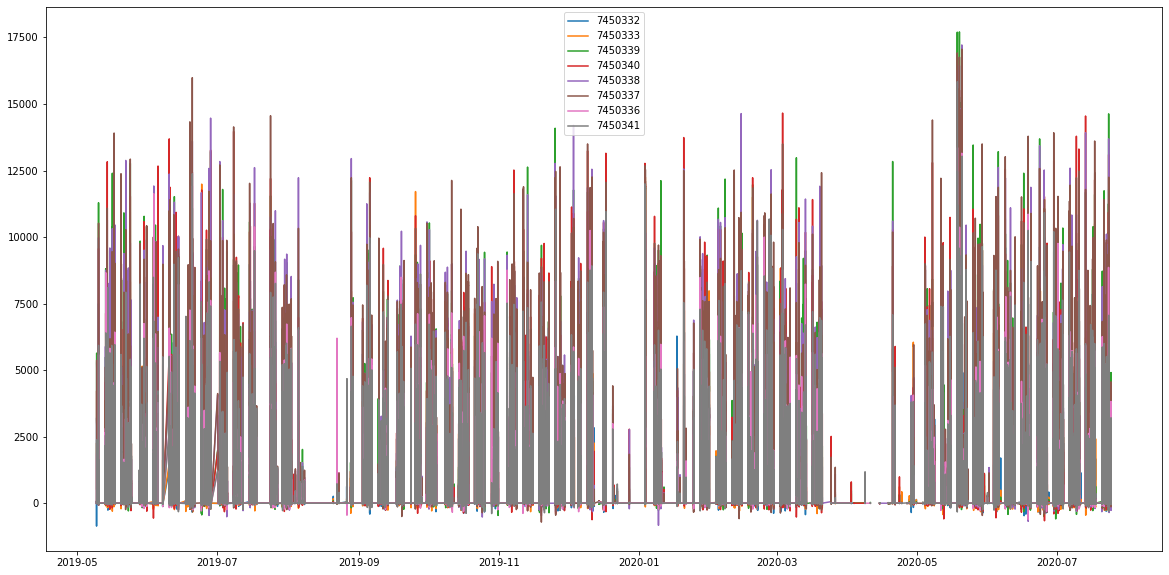

In [109]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(bons.timestamp, bons[['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341']])#, 'g')
plt.legend(['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341'])

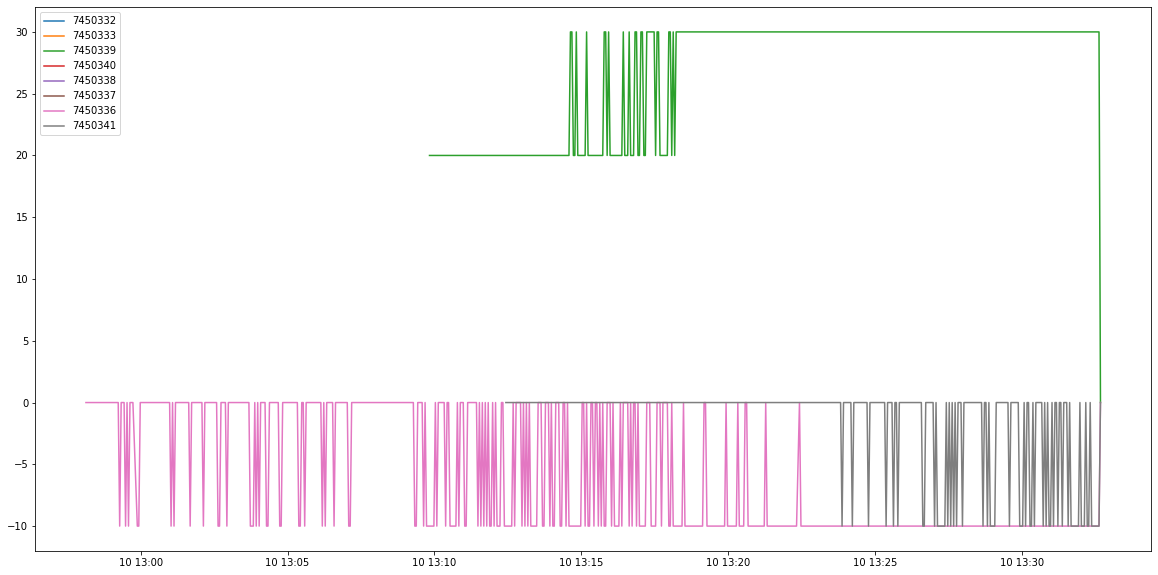

In [111]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(diacerto2.timestamp, diacerto[['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341']])#, 'g')
plt.legend(['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341'])

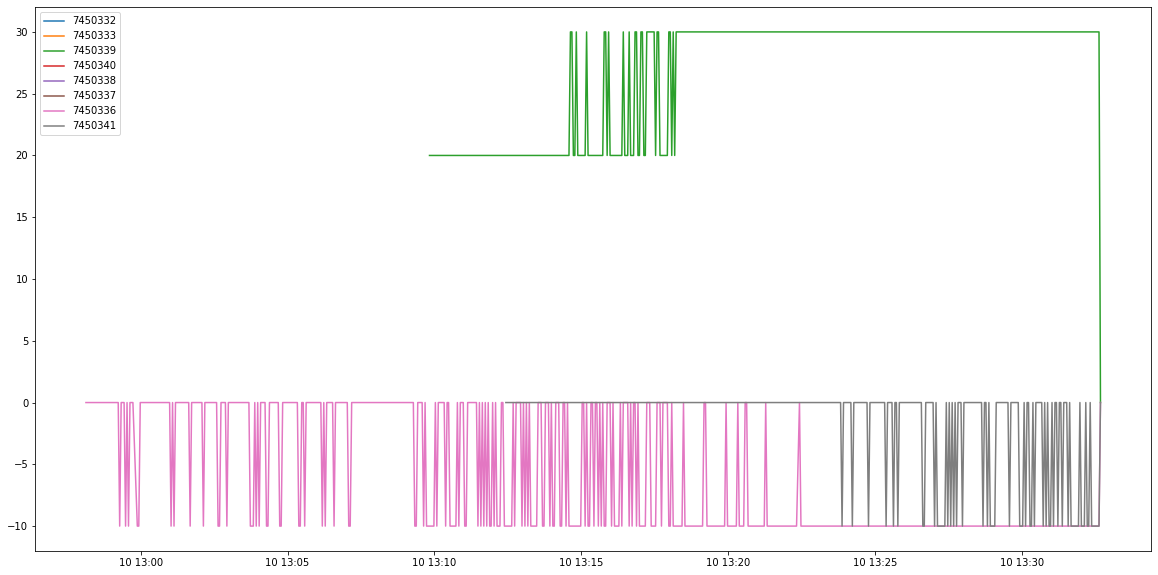

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(diacerto.timestamp, diacerto[['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341']])#, 'g')
plt.legend(['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341'])

In [45]:
diacerto

,0,7450332,7450333,7450339,7450340,7450338,7450337,7450336,7450341,timestamp,period
measurement,,,,,,,,,,,
9377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2020-04-10 12:58:08,00:10:15
9377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2020-04-10 12:58:14,00:00:06
9377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2020-04-10 12:58:23,00:00:09
9377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2020-04-10 12:58:47,00:00:24
9377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2020-04-10 12:58:47,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...
9377,NaN,NaN,NaN,30.0,NaN,NaN,NaN,-10.0,-10.0,2020-04-10 13:32:35,00:00:00
9377,NaN,NaN,NaN,30.0,NaN,NaN,NaN,-10.0,-10.0,2020-04-10 13:32:38,00:00:03
9377,NaN,NaN,NaN,30.0,NaN,NaN,NaN,-10.0,-10.0,2020-04-10 13:32:38,00:00:00


### 5) filter nan measurments?

### 6)  ver

In [ ]:
filtrado[filtrado.measurement== 8395]

In [ ]:
y = pd.get_dummies(filtrado[['cellSerialNumber_0','cellSerialNumber_1','cellSerialNumber_2','cellSerialNumber_3','cellSerialNumber_4','cellSerialNumber_5','cellSerialNumber_6','cellSerialNumber_7']], prefix='', prefix_sep='')

In [ ]:
substituir=y.groupby(y.columns, axis=1).sum()
substituir=substituir[['0','7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341']]
substituir

In [ ]:
substituir=substituir[['0','7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341']]

In [ ]:
filtrado=experiencia[experiencia.measurement == 952]

In [ ]:
teste=ordenado[ordenado.measurement == 30715]
teste.head(3)

In [ ]:
teste2=ordenado[ordenado.measurement == 10508]
teste2.head(3)

In [ ]:
teste3=ordenado[ordenado.measurement == 4024]
teste3.head(3)

In [ ]:
teste.cellWeight_0.value_counts()

In [ ]:
teste2.cellSerialNumber_0.value_counts()

In [ ]:
teste2.cellWeight_0.value_counts()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,3))
plt.plot(teste.timestamp, teste.cellWeight_0)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,3))
plt.plot(teste2.timestamp, teste2.cellWeight_0)

consideraçoes:
- claro problema de mediçoes com valores estagnados
- se nan e resultado de nao variar, pq e que nao varia tem imensos nan??

- ainda nao ocorreu interpolação... 
- dentro da mediçao de cell0 a celula foi morrendo e outras ficaraam no seu lugar!

In [ ]:
teste.period.value_counts()

In [ ]:
teste

In [ ]:
ordenado.head(2)

In [ ]:
y = pd.get_dummies(ordenado[['cellSerialNumber_0','cellSerialNumber_1','cellSerialNumber_2','cellSerialNumber_3','cellSerialNumber_4','cellSerialNumber_5','cellSerialNumber_6','cellSerialNumber_7']], prefix='', prefix_sep='')

In [ ]:
substituir=y.groupby(y.columns, axis=1).sum()
substituir

In [ ]:
substituir['0'].max()

## ORDEM 7450332	7450333	7450339	7450340	7450338	7450337	7450336	7450341


In [ ]:
substituir=substituir[['0','7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341']]
#frame = frame[['column I want first', 'column I want second'...etc.]]

In [ ]:
substituir

In [ ]:
substituir2=substituir

substituir2[substituir.columns[1]][1]

ordenado['cellSerialNumber_'+str(0)][1]

In [ ]:
substituir[['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341']]=np.nan

In [ ]:
substituir

In [ ]:
substituir.isnull().sum()

In [ ]:
for i in range(ordenado.shape[0]):
    for cell in range(8):
        if ordenado['cellSerialNumber_'+str(cell)][i]==substituir.columns[cell+1]:
            #print(ordenado['cellSerialNumber_'+str(cell)][i])
            #print(ordenado['cellWeight_'+str(cell)][i])
            substituir2[substituir.columns[cell+1]][i]=ordenado['cellWeight_'+str(cell)][i]

In [ ]:
substituir2

In [ ]:
substituir2#.to_csv('data_replaced_temp.csv')

In [ ]:
subtituir_plus= pd.concat([substituir2, ordenado[['timestamp','period','measurement']]], axis=1, sort=False)

In [ ]:
subtituir_plus#.to_csv('data_replaced_temp_c_time.csv')

In [ ]:
subtituir_plus= pd.concat([substituir2, ordenado[['timestamp','period','measurement']]], axis=1, sort=False)

In [ ]:
subtituir_plus

In [ ]:
subtituir_plus.isnull().sum()

### fill com base na pesagem

In [ ]:
subtituir_plus_pesagem=subtituir_plus.set_index('measurement')

In [ ]:
subtituir_plus_pesagem.head()

In [ ]:
subtituir_plus.shape

dia_interpolado=subtituir_plus.groupby('measurement')
dia_interpolado.head()

In [ ]:
dia_interpolado=subtituir_plus.groupby('measurement').fillna(method='ffill')
dia_interpolado['measurement']=subtituir_plus['measurement']
dia_interpolado=dia_interpolado.set_index('measurement')

In [ ]:
dia_interpolado#.to_csv('data_replaced.csv') #=subtituir_plus.groupby('measurement').fillna(method='ffill')

In [ ]:
teste=dia_interpolado.loc[30715]#[dia_interpolado.measurement == 30715]

In [ ]:
teste

Pessimo
- nao tem 6 celulas
- uma delas so -10

In [ ]:
data_com_todos=dia_interpolado[dia_interpolado['0']==0]

In [ ]:
data_com_todos

In [ ]:
data_com_todos.reset_index().measurement.nunique()

In [ ]:
data_com_todos.reset_index().measurement.value_counts()

In [ ]:
data_com_todos.loc[10508]

In [ ]:
dia10=data_com_todos.loc[10508]

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
#plt.xlim=((2000, 6000))

#plt.plot(dia102.timestamp, dia102.cellWeight_0, 'r')
plt.plot(dia10.timestamp, dia10[['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341']])#, 'g')

In [ ]:
pares=data_com_todos
pares['par1']=pares['']

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
#plt.xlim=((2000, 6000))

#plt.plot(dia102.timestamp, dia102.cellWeight_0, 'r')
plt.plot(dia10.timestamp, dia10[['7450332','7450333','7450339','7450340','7450338','7450337','7450336','7450341']])#, 'g')

In [ ]:
ordenado['cellSerialNumber_'+str(0)][0]==substituir.columns[1]

In [ ]:
ordenado['cellWeight_'+str(0)][0]

In [ ]:
ordenado.shape

In [ ]:
subtituir_plus.iloc[150000]

In [ ]:
ordenado.iloc[150000]

In [ ]:
substituir.iloc[150000]

In [ ]:
ordenado

## alteração do dataset

In [ ]:
ordenado.head(3)

In [ ]:
y = pd.get_dummies(ordenado[['cellSerialNumber_0','cellSerialNumber_1','cellSerialNumber_2','cellSerialNumber_3','cellSerialNumber_4','cellSerialNumber_5','cellSerialNumber_6','cellSerialNumber_7']], prefix='', prefix_sep='')

In [ ]:
teste=y.groupby(y.columns, axis=1).sum()
teste

In [ ]:
#ax = opsd_daily.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='-')
ax = dia10['cellWeight_0'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');

In [ ]:
dia10=dia10.set_index('timestamp')

In [ ]:
dia10.resample('3S')

In [ ]:
dia10['timestamp']= pd.to_datetime(dia10['timestamp']) 

In [ ]:
import datetime

dti = pd.to_datetime(['1/1/2018', np.datetime64('2018-01-01'),  datetime.datetime(2018, 1, 1)])


In [ ]:
dia10

In [ ]:
dia10_2=dia10

In [ ]:
dia10.set_index(dia10['timestamp'], inplace = True) 

In [ ]:
dia10

In [ ]:

dia10_2=dia10
dia10_2=dia10_2.set_index('timestamp', inplace=True)
dia10_2

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#dia10['datetime'] = pd.to_datetime(df['Time [dd.mm.yyyy hh:mm:ss.ms]'], format="%d.%m.%Y %H:%M:%S.%f")

#print (dia10)

#dia10_2=dia10
#dia10_2=dia10_2.set_index('timestamp', inplace=True)

ax = dia10_2['cellWeight_0'].plot()

#dia10_2.index=pd.to_datetime(dia10_2.index).strftime('%d-%m-%Y')
#'%d.%m.%Y %H:%M:%S.%f'

dia10_2.index=pd.to_datetime(dia10_2.index).strftime('%d.%m.%Y %H:%M:%S')#.%f')

#ticklabels = dia10_2.index.strftime('%Y-%m-%d')
ax.xaxis.set_major_formatter(ticker.FixedFormatter(dia10_2.index))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
plt.xticks(rotation=90)
plt.show()

In [ ]:
Dst_count = dia10["Dst"].where(df["Dst"]<-100).resample("1y").count()
Dst_count = Dst_count.reindex(df.index, method="bfill")

In [ ]:
dia10

In [ ]:
dia10.index=pd.to_datetime(dia10.index).strftime('%d.%m.%Y %H:%M:%S.%f')

In [ ]:
dia10_2

In [ ]:
teste=ordenado.set_index('timestamp')

In [ ]:
df.set_index(df['Date'].dt.date, inplace = True) 
df.asfreq(freq='1D').fillna(method='bfill', limit=1).dropna(how='all').drop_duplicates(keep='last')

In [ ]:
teste.loc['2019']

In [ ]:
dia11=teste.loc['2019-05']

In [ ]:
dia10.shape

In [ ]:
dia10.head(10)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(teste)

In [ ]:
teste=dia10.cellWeight_0.tolist()
teste

In [ ]:
dia10.set_index('timestamp', inplace=True)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#dia10['datetime'] = pd.to_datetime(df['Time [dd.mm.yyyy hh:mm:ss.ms]'], format="%d.%m.%Y %H:%M:%S.%f")

#print (dia10)

dia10_2=dia10
dia10_2=dia10_2.set_index('timestamp', inplace=True)

ax = dia10_2['cellWeight_0'].plot()

#ticklabels = dia10.index.strftime('%Y-%m-%d')
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
plt.show()

In [ ]:
dia10_2=dia10
dia10_2

In [ ]:
plt.plot("time", "y", data=df)

In [ ]:
dados['cellSerialNumber_0']=dados['cellSerialNumber_0'].fillna(0)
dados['cellSerialNumber_1']=dados['cellSerialNumber_1'].fillna(0)
dados['cellSerialNumber_2']=dados['cellSerialNumber_2'].fillna(0)
dados['cellSerialNumber_3']=dados['cellSerialNumber_3'].fillna(0)
dados['cellSerialNumber_4']=dados['cellSerialNumber_4'].fillna(0)
dados['cellSerialNumber_5']=dados['cellSerialNumber_5'].fillna(0)
dados['cellSerialNumber_6']=dados['cellSerialNumber_6'].fillna(0)
dados['cellSerialNumber_7']=dados['cellSerialNumber_7'].fillna(0)

In [ ]:
clean0=dados['cellSerialNumber_0'].tolist()
clean1=dados['cellSerialNumber_1'].tolist()
clean2=dados['cellSerialNumber_2'].tolist()
clean3=dados['cellSerialNumber_3'].tolist()
clean4=dados['cellSerialNumber_4'].tolist()
clean5=dados['cellSerialNumber_5'].tolist()
clean6=dados['cellSerialNumber_6'].tolist()
clean7=dados['cellSerialNumber_7'].tolist()

In [ ]:
(clean3)

In [ ]:
convert_first_to_generator = (str(w) for w in clean3)

In [ ]:
convert_first_to_generator

In [ ]:
int_arr = list(range(10))
convert_first_to_generator = (str(w) for w in int_arr)
print(''.join(convert_first_to_generator))

In [ ]:
(int_arr)

In [ ]:
clean4=[str(i) for i in clean4]

In [ ]:
teste

In [ ]:
for i in range(0, len(clean0)):    
    if clean4[i][0] == '0' and len(clean4[i])>1:
        clean4[i]=clean4[i][1:]

In [ ]:
clean4[3][0] == '0' and len(clean4[3])>1

In [ ]:
clean4

In [ ]:
str(int(clean7[0]))

In [ ]:
for i in range(0, len(clean0)):
    if type(clean0[i]) == float:
        clean0[i]=str(int(clean0[i]))
    if type(clean1[i]) == float:
        clean1[i]=str(int(clean1[i]))
    if type(clean2[i]) == float:
        clean2[i]=str(int(clean2[i]))
    if type(clean3[i]) == float:
        clean3[i]=str(int(clean3[i]))
    if type(clean4[i]) == float:
        clean4[i]=str(int(clean4[i]))
    if type(clean5[i]) == float:
        clean5[i]=str(int(clean5[i]))
    if type(clean6[i]) == float:
        clean6[i]=str(int(clean6[i]))
    if type(clean7[i]) == float:
        clean7[i]=str(int(clean7[i]))

In [ ]:
clean0=[str(i) for i in clean0]
clean1=[str(i) for i in clean1]
clean2=[str(i) for i in clean2]
clean3=[str(i) for i in clean3]
clean4=[str(i) for i in clean4]
clean5=[str(i) for i in clean5]
clean6=[str(i) for i in clean6]
clean7=[str(i) for i in clean7]

In [ ]:
for i in range(0, len(clean0)):
    if clean0[i][0] == '0' and len(clean0[i])>1:
        clean0[i]=clean0[i][1:]
    if clean1[i][0] == '0'and len(clean1[i])>1:
        clean1[i]=clean1[i][1:]
    if clean2[i][0] == '0' and len(clean2[i])>1:
        clean2[i]=clean2[i][1:]
    if clean3[i][0] == '0'and len(clean3[i])>1:
        clean3[i]=clean3[i][1:]
    if clean4[i][0] == '0'and len(clean4[i])>1:
        clean4[i]=clean4[i][1:]
    if clean5[i][0] == '0'and len(clean5[i])>1:
        clean5[i]=clean5[i][1:]
    if clean6[i][0] == '0'and len(clean6[i])>1:
        clean6[i]=clean6[i][1:]
    if clean7[i][0] == '0'and len(clean7[i])>1:
        clean7[i]=clean7[i][1:]

In [ ]:
dados['cellSerialNumber_0']=clean0
dados['cellSerialNumber_1']=clean1
dados['cellSerialNumber_2']=clean2
dados['cellSerialNumber_3']=clean3
dados['cellSerialNumber_4']=clean4
dados['cellSerialNumber_5']=clean5
dados['cellSerialNumber_6']=clean6
dados['cellSerialNumber_7']=clean7

In [ ]:
dados.head()

In [ ]:
dados['cellSerialNumber_7'].unique()

for i in range(0, dados.shape[0]+1):
    if type(dados['cellSerialNumber_0'][i]) == float:
        dados['cellSerialNumber_0'][i]=str(int(dados['cellSerialNumber_0'][i]))

In [ ]:
dados[['scaleGross','scaleNet']] = dados[['scaleGross','scaleNet']].fillna(value=0)
dados[['cellWeight_0','cellWeight_1','cellWeight_2','cellWeight_3','cellWeight_4','cellWeight_5','cellWeight_6','cellWeight_7']] = dados[['cellWeight_0','cellWeight_1','cellWeight_2','cellWeight_3','cellWeight_4','cellWeight_5','cellWeight_6','cellWeight_7']].fillna(value=0)
dados[['cellSerialNumber_0']] = dados[['cellSerialNumber_0']].astype(str)
dados[['terminalSerialNumber','scaleSerialNumber']]=dados[['terminalSerialNumber','scaleSerialNumber']].astype(str)


In [ ]:
details=pd.DataFrame(dados.dtypes, columns=['type'])
details['#Nan']=dados.isnull().sum(axis = 0)
details['#uniques']=dados.nunique()

In [ ]:
dados[['scaleGross','scaleNet']] = dados[['scaleGross','scaleNet']].fillna(value=0)
details['#Nan_replaced']=dados.isnull().sum(axis = 0)

In [ ]:
dados[['cellWeight_0','cellWeight_1','cellWeight_2','cellWeight_3','cellWeight_4','cellWeight_5','cellWeight_6','cellWeight_7']] = dados[['cellWeight_0','cellWeight_1','cellWeight_2','cellWeight_3','cellWeight_4','cellWeight_5','cellWeight_6','cellWeight_7']].fillna(value=0)
details['#Nan_cell_weights_at0']=dados.isnull().sum(axis = 0)

In [ ]:

#dados[['cellSerialNumber_0','cellSerialNumber_1','cellSerialNumber_2','cellSerialNumber_3','cellSerialNumber_4','cellSerialNumber_5','cellSerialNumber_6','cellSerialNumber_7']] = dados[['cellSerialNumber_0','cellSerialNumber_1','cellSerialNumber_2','cellSerialNumber_3','cellSerialNumber_4','cellSerialNumber_5','cellSerialNumber_6','cellSerialNumber_7']].astype(str) 
dados[['cellSerialNumber_0']] = dados[['cellSerialNumber_0']].astype(str) 
details['type_converted']=dados.dtypes

In [ ]:
dados[['terminalSerialNumber','scaleSerialNumber']]=dados[['terminalSerialNumber','scaleSerialNumber']].astype(str)
details['#nunqiues_corrected']=dados.nunique()

In [ ]:
details

In [ ]:
dados.head()

### avaliar problema 1: pesagens com valor nulo sendo que as celulas têm peso !

In [ ]:
sempesos=dados[dados.scaleGross == 0]

In [ ]:
sempesos.shape

In [ ]:
teste=sempesos[sempesos.cellSerialNumber_0!= '0']

In [ ]:
teste[teste.cellWeight_1!=0]

### avaliar problema 3: diferença de valores entre a pesagem e a soma (aquela coisa de haver provavelmente uma formula interna deles)


In [ ]:
dados.head()

In [ ]:
ativos=dados[dados.cellSerialNumber_0 != '0']

In [ ]:
ativos.scaleSerialNumber.value_counts()

In [ ]:
ativos[ativos.scaleGross!=0].scaleSerialNumber.value_counts()

In [ ]:
somas=ativos[ativos.scaleGross!=0]
somas.head()

In [ ]:
#somas['soma']=somas.sum(axis = 1)
somas['soma']=somas[['cellWeight_0','cellWeight_1','cellWeight_2','cellWeight_3','cellWeight_4','cellWeight_5','cellWeight_6','cellWeight_7']].sum(axis = 1)#df[col_list].sum(axis=1)

In [ ]:
somas[['terminalSerialNumber','scaleSerialNumber','scaleGross','scaleNet','soma','cellWeight_0','cellWeight_1','cellWeight_2','cellWeight_3','cellWeight_4','cellWeight_5','cellWeight_6','cellWeight_7']]

In [ ]:
somas.head()

### avaliar problema 4:Cells with same serial number in different bridges


In [ ]:
dados.head()

In [ ]:
pontes=pd.read_json('devicesinfos_partition1.json')
info_pontes=pontes[['scaleSerialNumber','terminalSerialNumber','scaleCellCount','scaleDataAvailability','timestamp','cell0_serialNumber','cell1_serialNumber','cell2_serialNumber','cell3_serialNumber','cell4_serialNumber','cell5_serialNumber','cell6_serialNumber','cell7_serialNumber']]

In [ ]:
info_pontes

In [ ]:
dados[dados['scaleSerialNumber']=='P083500022'].cellSerialNumber_0.value_counts()

In [ ]:
dados['cellSerialNumber_0'].unique()

In [ ]:

teste=dados[['cellSerialNumber_0']].astype(str)


In [ ]:
dados.shape[0]

In [ ]:
dados[['cellSerialNumber_0']].head(25)

In [ ]:
str(int(dados['cellSerialNumber_0'][0]))#.astype(int)

estrategia:
- cell id ja foram descartados porque sao todos unicos ou nan para a totalidade de pesagens
- os scalegross e scale net foram preenchidos com valor 0
- as cell weighting com nan sao preenchidas a 0
- os serial number estao numericos - converter para string
- terminal serial number tem valores reptidos, conversao para string resolveu

In [ ]:
erro1=dados[dados['scaleGross'].isnull()]

In [ ]:
erro1.cellSerialNumber_0.value_counts().sum()#.sort_values(['cellSerialNumber_0'], ascending=False)

In [ ]:
validar_ids=dados.sort_values(['cellSerialNumber_0']).set_index(['cellSerialNumber_0'])#.count()

In [ ]:
validar_ids

informações:
- Ha valores de pesagem (sclaegross/net) com valores>0 e qd as celulas de pesagem nao têm serial number (Nan) ex: 5df09f84e2d52275b7392292
- ha valores de pesagens negaivos ex 5cd9a59a9f4a53cf70f53d0d
- sera que cada ponte tem uma coleçao de celulas especificas? uma celula 0 so se liga com uma expecifica celula 1?


In [ ]:
validar_ids=dados.sort_values(['cellSerialNumber_0']).set_index(['cellSerialNumber_0']).count()

- opçao count apenas salienta que ha nan ha medida que se acrescenta celula

In [ ]:
validar_ids=dados.groupby(['cellSerialNumber_0']).count()

In [ ]:
validar_ids

- opçao nunique mostra que um serial number 0 pode ter mais que 1 serial nuber 1 (nem considerando NAN) logo ao e possivel substituir

In [ ]:
validar_ids=dados.groupby(['cellSerialNumber_0']).nunique()

In [ ]:
validar_ids

In [ ]:
dados[dados['cellSerialNumber_0']=='00000d9c']

In [ ]:
dados[dados['cellSerialNumber_0']=='13160003.0']

In [ ]:
validar_ids.max()

In [ ]:
ordenar no tempo

## Ate aqui assumiu-se nao deitar NaN fora
- substitui-se nan de pesagens por 0
- preservou-se nan de serial number de celulas porque a pesagem tinha valor completo
- eqauciona-se deitar fora se as celulas e pesagem completa for Nan, mas ainda nao ocorreu

# avaliar pontes

estrategia:
- clean dados 
- reajustar problema
- identificar o conceito anomalia (de como a detetam, onde e que ja aconteceu)

In [ ]:
pontes=pd.read_json('devicesinfos_partition1.json')

In [ ]:
pontes.columns

In [ ]:
pontes.scaleSerialNumber.nunique()

In [ ]:
pontes.head()

In [ ]:
info_pontes=pontes[['scaleSerialNumber','terminalSerialNumber','scaleCellCount','scaleDataAvailability','timestamp','cell0_serialNumber','cell1_serialNumber','cell2_serialNumber','cell3_serialNumber','cell4_serialNumber','cell5_serialNumber','cell6_serialNumber','cell7_serialNumber']]

In [ ]:
info_pontes

In [ ]:
info_pontes[['cell0_serialNumber','cell1_serialNumber','cell2_serialNumber','cell3_serialNumber','cell4_serialNumber','cell5_serialNumber','cell6_serialNumber','cell7_serialNumber']]=info_pontes[['cell0_serialNumber','cell1_serialNumber','cell2_serialNumber','cell3_serialNumber','cell4_serialNumber','cell5_serialNumber','cell6_serialNumber','cell7_serialNumber']].astype(str)

In [ ]:
pontes[pontes['scaleSerialNumber']=='P192100052'].nunique()

In [ ]:
info_pontes

In [ ]:
details_pontes=pd.DataFrame(info_pontes.dtypes, columns=['type'])
details_pontes['#Nan']=info_pontes.isnull().sum(axis = 0)
details_pontes['#uniques']=info_pontes.nunique()

In [ ]:
details_pontes

In [ ]:
teste=dados[dados['scaleSerialNumber']=='00000000']#.nunique()
teste

In [ ]:
teste[teste['scaleGross']==0]#.nunique()

In [ ]:
dados[dados['scaleSerialNumber']=='P192100052'].nunique()

In [ ]:
type(testes)

In [ ]:
dados['scaleSerialNumber'].unique()

In [ ]:
info_pontes['scaleSerialNumber'].unique()

In [ ]:
devices['serialNumber'].unique()

In [ ]:
dados['terminalSerialNumber'].unique()

In [ ]:
info_pontes['terminalSerialNumber'].unique()

In [ ]:
devices['terminalSerialNumber'].unique()

In [ ]:
dados['terminalSerialNumber'].value_counts()

In [ ]:
info_pontes.sort_values(['terminalSerialNumber','scaleSerialNumber'])

In [ ]:
info_pontes.groupby(['terminalSerialNumber','scaleSerialNumber']).nunique()

In [ ]:
info_pontes['scaleCellCount'].unique()

In [ ]:
devices.groupby(['terminalSerialNumber','serialNumber']).count()

In [ ]:
dados[['terminalSerialNumber']]=dados[['terminalSerialNumber']].astype(str)

In [ ]:
dados[dados['terminalSerialNumber']=='160690']

In [ ]:
devices=pd.read_json('devices_partition1.json')

In [ ]:
devices.nunique()

In [ ]:
devices.columns

In [ ]:
devices['customerCompany'].value_counts()

In [ ]:
devices['subsidiaryCompany'].value_counts()

In [ ]:
286353+1909891

In [ ]:
819343+1376901

- claramente as cellid variam a cada pesagem - o verdadeiro id das celulas e o serial number

In [ ]:
dados['scaleSerialNumber'].unique()

In [ ]:
dados['scaleSerialNumber'].value_counts()

informaçoes
- ha 11 pontes de pesagem

In [ ]:
ponte1=dados[dados['scaleSerialNumber']=='S173004032']

In [ ]:
ponte1.nunique()

In [ ]:
ponte1=dados[dados['scaleSerialNumber']=='S190601092']
details=pd.DataFrame(ponte1.nunique(), columns=['#uniques'])
details['#Nan']=ponte1.isnull().sum(axis = 0)
details

In [ ]:
ponte1[['scaleGross','scaleNet']] = ponte1[['scaleGross','scaleNet']].fillna(value=0)

In [ ]:
ponte1.isnull().sum(axis = 0)

In [ ]:
ponte1.nunique()

In [ ]:
ponte1

In [ ]:
alarmes=pd.read_json('alarms_partition1.json')

In [ ]:
alarmes

In [ ]:
alarmes['errorCode'].nunique()

In [ ]:
alarmes['serialNumber'].nunique()

In [ ]:
devices['serialNumber'].unique()

In [ ]:
devices

## shortcut

In [ ]:
alarmes=pd.read_json('alarms_partition1.json')

In [ ]:
devices=pd.read_json('devices_partition1.json')

In [ ]:
pontes=pd.read_json('devicesinfos_partition1.json')
info_pontes=pontes[['scaleSerialNumber','terminalSerialNumber','scaleCellCount','scaleDataAvailability','timestamp','cell0_serialNumber','cell1_serialNumber','cell2_serialNumber','cell3_serialNumber','cell4_serialNumber','cell5_serialNumber','cell6_serialNumber','cell7_serialNumber']]
info_pontes[['cell0_serialNumber','cell1_serialNumber','cell2_serialNumber','cell3_serialNumber','cell4_serialNumber','cell5_serialNumber','cell6_serialNumber','cell7_serialNumber']]=info_pontes[['cell0_serialNumber','cell1_serialNumber','cell2_serialNumber','cell3_serialNumber','cell4_serialNumber','cell5_serialNumber','cell6_serialNumber','cell7_serialNumber']].astype(str)

In [ ]:
dados2=pd.read_csv('all_weighings_full_cleaned.csv').drop(['Unnamed: 0'],axis=1)

In [ ]:
dados2.head()

# Analise ao device, sem importar quem o usa

In [ ]:
dados=pd.read_csv('all_weighings_full_cleaned_w_cell0.csv')

In [ ]:
dados['scaleSerialNumber'].value_counts()

In [ ]:
dados.to_csv('all_weighings_full_cleaned_w_cell0.csv')

In [ ]:
dados2=dados[dados['cellSerialNumber_0']!='0']

In [ ]:
dados2['scaleSerialNumber'].value_counts()

In [ ]:
dados2.to_csv('all_weighings_full_cleaned.csv')

# 124

In [ ]:
focus=dados[dados['scaleSerialNumber']=='P124303992']

In [ ]:
focus.terminalSerialNumber.unique()

In [ ]:
focus['terminalSerialNumber'].value_counts()

In [ ]:
focus2=focus[focus['terminalSerialNumber']=='SN00000050']

In [ ]:
info_pontes[info_pontes['scaleSerialNumber']=='P124303992']

In [ ]:
details_124=pd.DataFrame(focus.dtypes, columns=['type'])
details_124['#Nan']=focus.isnull().sum(axis = 0)
details_124['#uniques']=focus.nunique()
details_124

In [ ]:
focus['cellSerialNumber_0'].unique()

In [ ]:
focus2['cellSerialNumber_0'].unique()

In [ ]:
focus['cellSerialNumber_1'].unique()

In [ ]:
focus2['cellSerialNumber_1'].unique()

In [ ]:
focus['cellSerialNumber_2'].unique()

In [ ]:
focus2['cellSerialNumber_2'].unique()

In [ ]:
focus2.sort_values(['cellSerialNumber_0','cellSerialNumber_1','cellSerialNumber_2']).set_index('cellSerialNumber_0')

In [ ]:
focus2.groupby(['cellSerialNumber_0','cellSerialNumber_1','cellSerialNumber_2']).count()

In [ ]:
focus.groupby(['cellSerialNumber_0','cellSerialNumber_1','cellSerialNumber_2']).count()

notas:
- o serial p124 com terminal 'SN000025' em vez de 'SN00000050' - que e o reconhecido na info, tem todas as celuulas a null
- a info determina que o p124 tem 3 celulas. efetivamnet,e so a ate 3 valores unicos de celulas, ou seja, apenas ha uma ponte do tipo 124??
- de entre as 3 celulas unicas, verifica-se que apenas 305 ocorrencias tem as 3 celulas. e parece que em 62780 ocorrencias a celula 0 falhou
- assume se que a contagem começa sempre da 0 e se alguma falha, o numero e antecedido

# 191

In [ ]:
focus=dados2[dados2['scaleSerialNumber']=='P191021852']

In [ ]:
focus.shape

In [ ]:
info_pontes[info_pontes['scaleSerialNumber']=='P191021852']

In [ ]:
devices[devices['serialNumber']=='P191021852']

In [ ]:
erros_ponte=alarmes[alarmes['serialNumber']=='P191021852']
print('scale board replacement')
erros_ponte

In [ ]:
focus.terminalSerialNumber.unique()

In [ ]:
details_191=pd.DataFrame(focus.dtypes, columns=['type'])
details_191['#uniques']=focus.nunique()
details_191

In [ ]:
avaliar=focus.groupby(['cellSerialNumber_0','cellSerialNumber_1','cellSerialNumber_2','cellSerialNumber_3','cellSerialNumber_4','cellSerialNumber_5','cellSerialNumber_6','cellSerialNumber_7']).count()

In [ ]:
avaliar

In [ ]:
ocorrencias=avaliar.sort_values(['cellSerialNumber_7','cellSerialNumber_6','cellSerialNumber_5','cellSerialNumber_4','cellSerialNumber_3','cellSerialNumber_2','cellSerialNumber_1','cellSerialNumber_0'],ascending=False)

In [ ]:
pd.set_option('display.max_rows', 30)
ocorrencias.head(100)

In [ ]:
72502+1103+75+172+1064+2592+200+235+929

In [ ]:
print('Pesagens na ponte P191021852: '+ str(focus.shape[0]))
print('Pesagens na ponte P191021852 com todas as celulas ativas: ' + str(focus[focus['cellSerialNumber_7']!= '0'].shape[0]) + '  '+ str(round((focus[focus['cellSerialNumber_7']!= '0'].shape[0])/focus.shape[0]*100,1)) + '%')
print('Pesagens na ponte P191021852 com 7 celulas ativas: ' + str(focus[focus['cellSerialNumber_6']!= '0'].shape[0]) + '  '+ str(round((focus[focus['cellSerialNumber_6']!= '0'].shape[0])/focus.shape[0]*100,1)) + '%')
print('Pesagens na ponte P191021852 com 6 celulas ativas: ' + str(focus[focus['cellSerialNumber_5']!= '0'].shape[0]) + '  '+ str(round((focus[focus['cellSerialNumber_5']!= '0'].shape[0])/focus.shape[0]*100,1)) + '%')
print('Pesagens na ponte P191021852 com 5 celulas ativas: ' + str(focus[focus['cellSerialNumber_4']!= '0'].shape[0]) + '  '+ str(round((focus[focus['cellSerialNumber_4']!= '0'].shape[0])/focus.shape[0]*100,1)) + '%')
print('Pesagens na ponte P191021852 com 4 celulas ativas: ' + str(focus[focus['cellSerialNumber_3']!= '0'].shape[0]) + '  '+ str(round((focus[focus['cellSerialNumber_3']!= '0'].shape[0])/focus.shape[0]*100,1)) + '%')
print('Pesagens na ponte P191021852 com 3 celulas ativas: ' + str(focus[focus['cellSerialNumber_2']!= '0'].shape[0]) + '  '+ str(round((focus[focus['cellSerialNumber_2']!= '0'].shape[0])/focus.shape[0]*100,1)) + '%')
print('Pesagens na ponte P191021852 com 2 celulas ativas: ' + str(focus[focus['cellSerialNumber_1']!= '0'].shape[0]) + '  '+ str(round((focus[focus['cellSerialNumber_1']!= '0'].shape[0])/focus.shape[0]*100,1)) + '%')
print('Pesagens na ponte P191021852 com 1 celulas ativas: ' + str(focus[focus['cellSerialNumber_0']!= '0'].shape[0]) + '  '+ str(round((focus[focus['cellSerialNumber_0']!= '0'].shape[0])/focus.shape[0]*100,1)) + '%')

print('Pesagens na ponte P191021852 descartadas por não ter celulas ativas: ' + str(320459-focus.shape[0]))


In [ ]:
print('Weighing in bridge P191021852: '+ str(focus.shape[0]))
print('Weighing in bridge P191021852 with all cells active: ' + str(focus[focus['cellSerialNumber_7']!= '0'].shape[0]) + '  '+ str(round((focus[focus['cellSerialNumber_7']!= '0'].shape[0])/focus.shape[0]*100,1)) + '%')
print('Weighing in bridge P191021852 with 7 active cells: ' + str(focus[focus['cellSerialNumber_6']!= '0'].shape[0]) + '  '+ str(round((focus[focus['cellSerialNumber_6']!= '0'].shape[0])/focus.shape[0]*100,1)) + '%')
print('Weighing in bridge P191021852 with 6 active cells: ' + str(focus[focus['cellSerialNumber_5']!= '0'].shape[0]) + '  '+ str(round((focus[focus['cellSerialNumber_5']!= '0'].shape[0])/focus.shape[0]*100,1)) + '%')
print('Weighing in bridge P191021852 with 5 active cells: ' + str(focus[focus['cellSerialNumber_4']!= '0'].shape[0]) + '  '+ str(round((focus[focus['cellSerialNumber_4']!= '0'].shape[0])/focus.shape[0]*100,1)) + '%')
print('Weighing in bridge P191021852 with 4 active cells: ' + str(focus[focus['cellSerialNumber_3']!= '0'].shape[0]) + '  '+ str(round((focus[focus['cellSerialNumber_3']!= '0'].shape[0])/focus.shape[0]*100,1)) + '%')
print('Weighing in bridge P191021852 with 3 active cells: ' + str(focus[focus['cellSerialNumber_2']!= '0'].shape[0]) + '  '+ str(round((focus[focus['cellSerialNumber_2']!= '0'].shape[0])/focus.shape[0]*100,1)) + '%')
print('Weighing in bridge P191021852 with 2 active cells: ' + str(focus[focus['cellSerialNumber_1']!= '0'].shape[0]) + '  '+ str(round((focus[focus['cellSerialNumber_1']!= '0'].shape[0])/focus.shape[0]*100,1)) + '%')
print('Weighing in bridge P191021852 with 1 active cells: ' + str(focus[focus['cellSerialNumber_0']!= '0'].shape[0]) + '  '+ str(round((focus[focus['cellSerialNumber_0']!= '0'].shape[0])/focus.shape[0]*100,1)) + '%')

print('Weighing in bridge P191021852 discarded due to no active cells: ' + str(320459-focus.shape[0]))

In [ ]:
#calcular percentagens para X celulas ativas
impasse=focus[focus['cellSerialNumber_6']!= '0']
impasse[impasse['cellSerialNumber_7']== '0'].shape[0]

 avaliar caracterisitcas como:
 - percentagem de vezes que x celula falha
 - avaliar media do valor do peso em pesagens feitas com a totalidade, 7, 6, 5... celulas
 - avaliar tendencias de falha de uma celula com base na falha de outras celulas
 - avaliar fator temporal na falhas: se o processo de falha e sequencial no tempo, e se e posterior a atingir um valor isolado ou cumulativo de peso

### ordenar por data

In [ ]:
ordenado=focus.sort_values(by='timestamp')
ordenado

Gravaçoes de 2019-05-09 14:22:55 ate 2020-05-22 15:40:08

### transformar celulas tipo one hot

In [ ]:
y = pd.get_dummies(focus[['cellSerialNumber_0','cellSerialNumber_1','cellSerialNumber_2','cellSerialNumber_3','cellSerialNumber_4','cellSerialNumber_5','cellSerialNumber_6','cellSerialNumber_7']], prefix='', prefix_sep='')#,'cellSerialNumber_1']])#, prefix='Country')

In [ ]:
y

In [ ]:
y

In [ ]:
teste=y.groupby(y.columns, axis=1).sum()
teste

In [ ]:
focus.head()

In [ ]:
teste['timestamp']=focus.timestamp

In [ ]:
teste

In [ ]:
testeordenado=teste.sort_values(by='timestamp')

In [ ]:
testeordenado

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize =(50,12))
mean_group = testeordenado.iloc[: , [1,2,3,4,5,6,7,8]]#   data.groupby(["ORDERDATE"])["SALES"].median()
plt.plot(mean_group)
plt.title("Time series median")
#plt.legend(teste.columns[1:])
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(testeordenado.corr())
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(testeordenado.corr(method='spearman'))
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(testeordenado.cov())
plt.show()


In [ ]:
f = plt.figure(figsize=(10, 10))
plt.matshow(testeordenado.corr(), fignum=f.number)
plt.xticks(range(testeordenado.shape[1]), testeordenado.columns, fontsize=14, rotation=45)
plt.yticks(range(testeordenado.shape[1]), testeordenado.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [ ]:
teste.columns[1:]

In [ ]:
teste.iloc[: , [1,2,3,4,5,6,7,8]]

In [ ]:
Data=focus.drop(['_id','terminalSerialNumber','scaleSerialNumber'],axis=1)#focus[['timestamp','scaleGross','scaleNet']]

In [ ]:
Data.head()

In [ ]:
result = pd.concat([Data, teste], axis=1, sort=False)

In [ ]:
result

### avaliar id iguais


validar_ids=dados.sort_values(['_id','cellId_0']).set_index(['_id','cellId_0']).count()

validar_ids=dados.sort_values(['_id'],ascending=False)#.set_index(['_id'])

dados.groupby(['_id']).size().sort_values(ascending=False)

##### Avaliar contagem de variaveis para msm id = nºx que se repete id

In [ ]:
validar_ids=dados.groupby('cellId_0').count()#.apply(pd.DataFrame.sort_values, '_id')

In [ ]:
validar_ids.sort_values(by=['cellId_0','cellId_1','cellId_2','cellId_3','cellId_4','cellId_5'], ascending=False)

In [ ]:
maybe2=dados[dados['_id']=='5eb0761da4982500078f7abd']
maybe2

##### Avaliar contagem de variaveis UNICAS para msm cell 

In [ ]:
validar_ids=dados.groupby('cellId_0').nunique()

In [ ]:
validar_ids=dados.sort_values(['cellId_0']).set_index(['cellId_0'])

In [ ]:
validar_ids=dados.sort_values(['scaleSerialNumber']).set_index(['scaleSerialNumber'])

In [ ]:
validar_ids.max()

In [ ]:
validar_ids

##### Avaliar contagem de variaveis UNICAS para msm id = nºx que se repete id

In [ ]:
validar_ids=dados.groupby('_id').nunique()

In [ ]:
validar_ids.max()

In [ ]:
validar_ids.sort_values(by=['terminalSerialNumber'], ascending=False)

In [ ]:
maybe2=dados[dados['_id']=='5e8e79f931557300072fdafc']
maybe2

informaçoes
- ha muitos duplicados ao nivel do id - deitar fora

In [ ]:
dados_no_duplicates=dados.drop_duplicates()
print(dados.shape)
print(dados_no_duplicates.shape)

In [ ]:
dados_no_duplicates.nunique()

In [ ]:
maybe2=dados_no_duplicates[dados_no_duplicates['_id']=='5e8e79f931557300072fdafc']
maybe2

informaçao:
- como diferente tipos de dados ou casas decimais provocam duplicates, avaliar id unicos de pesagens e fazer inner join com dados
- no fim so se pode ter 871549 pesagens

# dados unicos

In [ ]:
dados_no_duplicates_id=dados.drop_duplicates(subset=['_id'])
print(dados_no_duplicates_id.shape)
#df.drop_duplicates(subset=['bio', 'center', 'outcome'])

In [ ]:
dados_no_duplicates_id.to_csv('weighings.csv')

In [ ]:
dados=pd.read_csv('weighings.csv').drop('Unnamed: 0', axis=1)

In [ ]:
dados.head()

#### avaliar combinaçoes

In [ ]:
validar_ids=dados.groupby('_id').nunique()

In [ ]:
validar_ids=dados.groupby('cellId_2').nunique()

In [ ]:
validar_ids.max()

In [ ]:
details=pd.DataFrame(dados.dtypes, columns=['type'])
details['#Nan']=dados.isnull().sum(axis = 0)
details['#uniques']=dados.nunique()

In [ ]:
details['valida']=details['#uniques']+details['#Nan']

In [ ]:
details

Informaçoes:
- para qq groupby de celula, o maximo de unicos e sempre 1, ou seja a combinaçao cel 0-1-2-3... e sempre unica. um id da celula 1 so da para a celula com id0 certa
- confirmado pelo numeor de unicos+nan ser igual ao totla de pesagens feitas

grave:
- cada nao ha varias pesagens diferentes com o msm id de celulas, ie, nenhuma celeua com mais que uma pesagem

### transformaçao dos dados

- avalair qts pontes têm 2,4,6,8 celulas
- avaliar se ha pontes com celulas impar
- transformaçao das datas + idade da celula
- 

In [ ]:
dados.head()

#### Avaliar nº pesagens  para pontes com variavel nº de celulas

In [ ]:
## avalair qts celulas
dados_8=dados[dados['cellId_0'].notnull() & dados['cellId_1'].notnull() & dados['cellId_2'].notnull() & dados['cellId_3'].notnull() & dados['cellId_4'].notnull() & dados['cellId_5'].notnull() & dados['cellId_6'].notnull() & dados['cellId_7'].notnull()]
print('nº weighing with 8 functional cells:' + str(dados_8.shape[0]))

dados_7=dados[dados['cellId_0'].notnull() & dados['cellId_1'].notnull() & dados['cellId_2'].notnull() & dados['cellId_3'].notnull() & dados['cellId_4'].notnull() & dados['cellId_5'].notnull() & dados['cellId_6'].notnull() ]
print('nº weighing with 7 functional cells:' + str(dados_7.shape[0]))

dados_6=dados[dados['cellId_0'].notnull() & dados['cellId_1'].notnull() & dados['cellId_2'].notnull() & dados['cellId_3'].notnull() & dados['cellId_4'].notnull() & dados['cellId_5'].notnull()]
print('nº weighing with 6 functional cells:' + str(dados_6.shape[0]))

dados_5=dados[dados['cellId_0'].notnull() & dados['cellId_1'].notnull() & dados['cellId_2'].notnull() & dados['cellId_3'].notnull() & dados['cellId_4'].notnull()]
print('nº weighing with 5 functional cells:' + str(dados_5.shape[0]))

dados_4=dados[dados['cellId_0'].notnull() & dados['cellId_1'].notnull() & dados['cellId_2'].notnull() & dados['cellId_3'].notnull()]
print('nº weighing with 4 functional cells:' + str(dados_4.shape[0]))

dados_3=dados[dados['cellId_0'].notnull() & dados['cellId_1'].notnull() & dados['cellId_2'].notnull()]
print('nº weighing with 3 functional cells:' + str(dados_3.shape[0]))

dados_2=dados[dados['cellId_0'].notnull() & dados['cellId_1'].notnull()]
print('nº weighing with 2 functional cells:' + str(dados_2.shape[0]))

dados_1=dados[dados['cellId_0'].notnull()]
print('nº weighing with 1 functional cells:' + str(dados_1.shape[0]))

- Há pesagens para pontes com nº impar
- Há 29258 pesagens sem ponte nenhuma
- Para alem de todas as comiançoes de id de celulas serem unicas, nao ha cenarios de falhar celula 0 e ter celula1

In [ ]:
combined = dados.append(dados_1)
combined=combined[~combined.index.duplicated(keep=False)]
print(combined.shape[0])

In [ ]:
combined.head()

In [ ]:
details=pd.DataFrame(combined.nunique(), columns=['nº uniques with cell0 Nan'])
details['n_uniques with cell0']=dados_1.nunique()
details['n_uniques in all']=dados.nunique()

In [ ]:
details

In [ ]:
## nao ha cenario de nao haver cell 0 e ter cell 1
teste=dados[dados['cellId_0'].isnull()]
teste['cellId_2'].unique()

In [ ]:
teste=dados[dados['cellId_1'].isnull()]
teste['cellId_3'].unique()

### Data

In [ ]:
dados.head()

In [ ]:
    df.data= pd.to_datetime(df.data, format='%Y%m%d%H%M%S')
    df['day'] = df['data'].dt.day
    df['Hour'] = df['data'].dt.hour
    df['Minute'] = df['data'].dt.minute
    df['Year'] = df['data'].dt.year
    df['Month'] = df['data'].dt.month
    
    Year=df.Year.unique()[0]
    Month=df.Month.unique()[0]
    Day=df.day.unique()[0]

In [ ]:
dados['data']= pd.to_datetime(dados.timestamp, format='%Y-%m-%d %H:%M:%S.%f')#'%Y%m%d%H%M%S%S%f')

In [ ]:
dados['day'] = dados['data'].dt.day

In [ ]:
dados

## teste bascio PCA

In [ ]:
def encode(data,categorical_features):
    categorical_names = {}
    for feature in categorical_features:
        le = sklearn.preprocessing.LabelEncoder()
        #le.fit(frame2[:, feature])
        #train_numpy_array[:, feature] = le.fit_transform(train_numpy_array[:, feature])
        data[:, feature] = le.fit_transform(data[:, feature])
        categorical_names[feature] = le.classes_
    return data, categorical_names

In [ ]:
prePCA.head()

In [ ]:
prePCA=dados.set_index('_id').drop('timestamp', axis=1)
categorical_features = [0,1,4,5,20]

- Converter data em idade
- transformar id de celulas em se tem 2,4,6,8, impares
- transformar ids em se e a combinaçao 1 ,2, 3 ....

In [ ]:
from sklearn.decomposition import PCA, IncrementalPCA
pcat = PCA()
principalComponentsT = pcat.fit_transform(dados)
pesos= pcat.explained_variance_ratio_
loadingT=pcat.components_.T * np.sqrt(pcat.explained_variance_)